In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.likelihood import LikelihoodClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


%load_ext autoreload
%autoreload 2

In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2009')

# Load data from a JSONL file
market = Market.loader('2009/09/01','2009/10/01', data_path)

100%|██████████| 48/48 [12:38<00:00, 15.80s/it]


In [3]:
# Get periods of length 15
periods = market.get_periods(period_length=3600)
print(f"Number of periods: {len(periods)}")

Number of periods: 264


In [5]:
clustering = LikelihoodClustering().fit(periods, generations=10, mutation_rate=0.1, num_clusters=10)

print('-' * 50)
clustering.summarize_clusters()
print('-' * 50)

Solving with PGA...: 100%|██████████| 10/10 [00:32<00:00,  3.24s/it]

Best solution : [5, 4, 5, 8, 7, 9, 3, 2, 8, 8, 6, 7, 1, 0, 5, 2, 0, 1, 8, 0, 8, 1, 4, 7, 2, 5, 3, 5, 9, 1, 5, 0, 1, 3, 1, 4, 3, 8, 6, 2, 8, 4, 5, 7, 7, 1, 9, 1, 2, 5, 0, 0, 4, 1, 4, 5, 4, 9, 3, 4, 6, 5, 4, 7, 1, 8, 5, 0, 6, 7, 7, 2, 4, 4, 9, 3, 6, 1, 8, 8, 3, 4, 4, 0, 2, 0, 7, 2, 8, 9, 9, 6, 7, 0, 0, 4, 9, 4, 7, 3, 1, 5, 5, 2, 8, 3, 1, 2, 9, 5, 8, 3, 1, 9, 3, 5, 9, 9, 5, 6, 2, 3, 1, 4, 3, 5, 8, 0, 8, 7, 3, 8, 4, 4, 9, 2, 8, 7, 9, 1, 7, 5, 4, 2, 9, 2, 1, 0, 2, 9, 6, 9, 4, 5, 0, 0, 0, 1, 4, 9, 9, 0, 1, 3, 2, 0, 0, 3, 1, 1, 5, 2, 0, 8, 5, 3, 4, 7, 9, 1, 6, 7, 8, 6, 7, 8, 6, 3, 5, 5, 5, 3, 3, 3, 8, 5, 7, 6, 5, 5, 8, 1, 9, 2, 6, 0, 7, 9, 0, 6, 6, 2, 2, 4, 2, 1, 5, 6, 3, 9, 8, 7, 3, 7, 0, 1, 8, 8, 7, 6, 6, 7, 0, 5, 3, 1, 1, 0, 8, 9, 2, 8, 6, 4, 0, 9, 1, 5, 3, 7, 2, 4, 9, 7, 2, 1, 9, 0, 8, 7, 8, 7, 3, 0]
Best score : 72.1335
--------------------------------------------------
Number of periods: 264
Number of clusters: 10
Cluster sizes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster labels: [5, 4, 5, 8

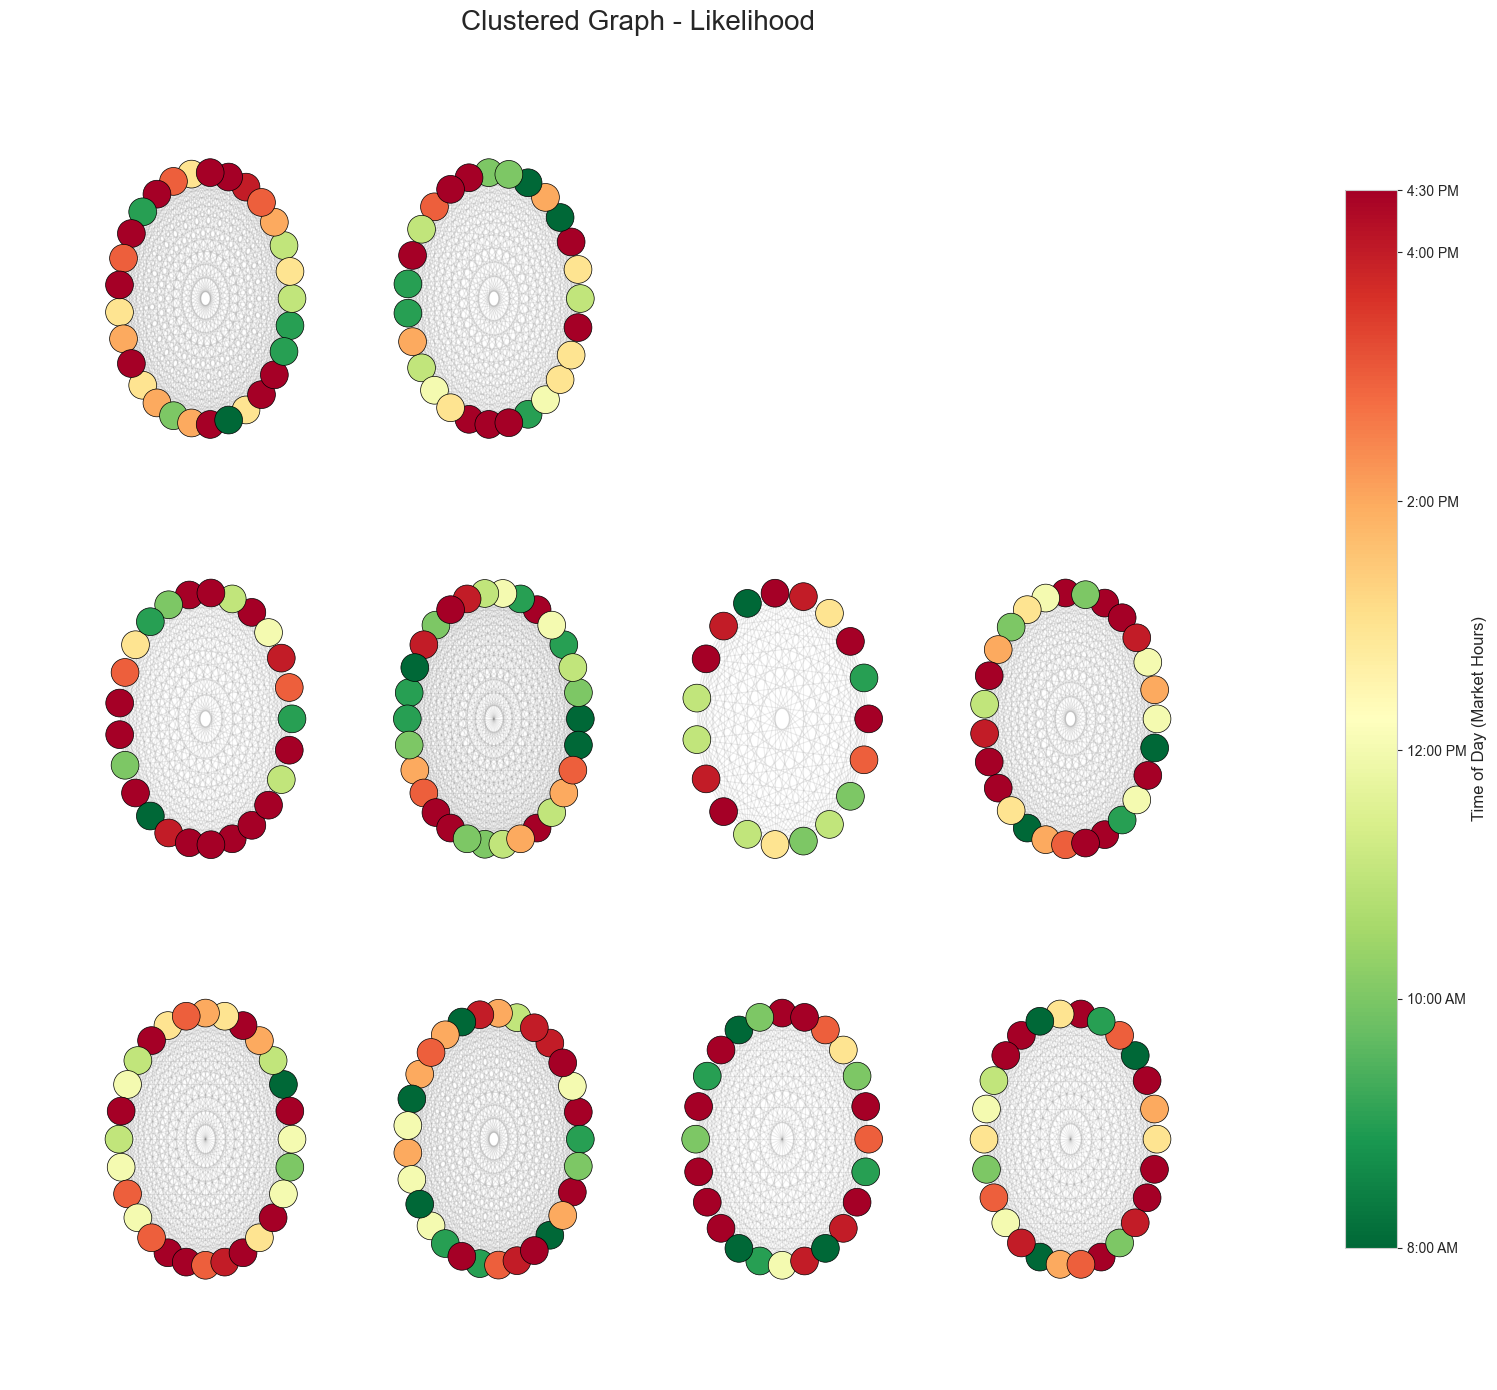

In [7]:
clustering.plot_cluster_2(method='Likelihood')